<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_3_2_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n20.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,75.133016,41.668152,45.569108,-5.913476e+04,-5.896239e+04,252729.821653,-3.116922e+05
1,0.0,1.0,83.493076,71.654182,73.754014,1.453627e+06,1.453866e+06,273091.160340,1.180775e+06
2,0.0,2.0,34.821697,72.166945,91.811871,-5.463921e+05,-5.461833e+05,-95619.517024,-4.505638e+05
3,0.0,3.0,73.535080,32.348287,95.612899,-7.175865e+04,-7.154716e+04,-490510.498021,4.189633e+05
4,0.0,4.0,20.252706,23.879753,95.219276,8.967538e+03,9.116890e+03,-745749.773409,7.548667e+05
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,76.826062,22.147932,58.898507,4.080270e+04,4.097057e+04,-389390.328664,4.303609e+05
29996,999.0,26.0,24.186532,64.576322,90.025267,-4.605745e+05,-4.603857e+05,350236.597899,-8.106223e+05
29997,999.0,27.0,58.294115,42.790093,35.087036,-1.214350e+04,-1.199733e+04,-34699.565068,2.270224e+04
29998,999.0,28.0,51.046087,68.182439,43.802989,1.761836e+06,1.762009e+06,364556.290267,1.397453e+06


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,75.133016,41.668152,45.569108,-5.913476e+04,-5.896239e+04,252729.821653,-3.116922e+05
1,0.0,1.0,83.493076,71.654182,73.754014,1.453627e+06,1.453866e+06,273091.160340,1.180775e+06
2,0.0,2.0,34.821697,72.166945,91.811871,-5.463921e+05,-5.461833e+05,-95619.517024,-4.505638e+05
3,0.0,3.0,73.535080,32.348287,95.612899,-7.175865e+04,-7.154716e+04,-490510.498021,4.189633e+05
4,0.0,4.0,20.252706,23.879753,95.219276,8.967538e+03,9.116890e+03,-745749.773409,7.548667e+05
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,76.826062,22.147932,58.898507,4.080270e+04,4.097057e+04,-389390.328664,4.303609e+05
29996,999.0,26.0,24.186532,64.576322,90.025267,-4.605745e+05,-4.603857e+05,350236.597899,-8.106223e+05
29997,999.0,27.0,58.294115,42.790093,35.087036,-1.214350e+04,-1.199733e+04,-34699.565068,2.270224e+04
29998,999.0,28.0,51.046087,68.182439,43.802989,1.761836e+06,1.762009e+06,364556.290267,1.397453e+06


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...          y_hat         e_hat
rep   index                        ...                             
0.0   0.0    75.133016  41.668152  ...  252729.821653 -3.116922e+05
      1.0    83.493076  71.654182  ...  273091.160340  1.180775e+06
      2.0    34.821697  72.166945  ...  -95619.517024 -4.505638e+05
      3.0    73.535080  32.348287  ... -490510.498021  4.189633e+05
      4.0    20.252706  23.879753  ... -745749.773409  7.548667e+05
...                ...        ...  ...            ...           ...
999.0 25.0   76.826062  22.147932  ... -389390.328664  4.303609e+05
      26.0   24.186532  64.576322  ...  350236.597899 -8.106223e+05
      27.0   58.294115  42.790093  ...  -34699.565068  2.270224e+04
      28.0   51.046087  68.182439  ...  364556.290267  1.397453e+06
      29.0   81.101055  97.291333  ...  743773.477215  1.553577e+06

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...          y_hat         e_hat
rep   index                        ...                             
0.0   0.0    75.133016  41.668152  ...  252729.821653 -3.116922e+05
      1.0    83.493076  71.654182  ...  273091.160340  1.180775e+06
      2.0    34.821697  72.166945  ...  -95619.517024 -4.505638e+05
      3.0    73.535080  32.348287  ... -490510.498021  4.189633e+05
      4.0    20.252706  23.879753  ... -745749.773409  7.548667e+05
...                ...        ...  ...            ...           ...
999.0 25.0   76.826062  22.147932  ... -389390.328664  4.303609e+05
      26.0   24.186532  64.576322  ...  350236.597899 -8.106223e+05
      27.0   58.294115  42.790093  ...  -34699.565068  2.270224e+04
      28.0   51.046087  68.182439  ...  364556.290267  1.397453e+06
      29.0   81.101055  97.291333  ...  743773.477215  1.553577e+06

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,75.133016,41.668152,45.569108,-5.913476e+04,-5.896239e+04,252729.821653,-3.116922e+05
1,0.0,1.0,83.493076,71.654182,73.754014,1.453627e+06,1.453866e+06,273091.160340,1.180775e+06
2,0.0,2.0,34.821697,72.166945,91.811871,-5.463921e+05,-5.461833e+05,-95619.517024,-4.505638e+05
3,0.0,3.0,73.535080,32.348287,95.612899,-7.175865e+04,-7.154716e+04,-490510.498021,4.189633e+05
4,0.0,4.0,20.252706,23.879753,95.219276,8.967538e+03,9.116890e+03,-745749.773409,7.548667e+05
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,76.826062,22.147932,58.898507,4.080270e+04,4.097057e+04,-389390.328664,4.303609e+05
29996,999.0,26.0,24.186532,64.576322,90.025267,-4.605745e+05,-4.603857e+05,350236.597899,-8.106223e+05
29997,999.0,27.0,58.294115,42.790093,35.087036,-1.214350e+04,-1.199733e+04,-34699.565068,2.270224e+04
29998,999.0,28.0,51.046087,68.182439,43.802989,1.761836e+06,1.762009e+06,364556.290267,1.397453e+06


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...          y_hat         e_hat
rep   index                        ...                             
0.0   0.0    75.133016  41.668152  ...  252729.821653 -3.116922e+05
      1.0    83.493076  71.654182  ...  273091.160340  1.180775e+06
      2.0    34.821697  72.166945  ...  -95619.517024 -4.505638e+05
      3.0    73.535080  32.348287  ... -490510.498021  4.189633e+05
      4.0    20.252706  23.879753  ... -745749.773409  7.548667e+05
...                ...        ...  ...            ...           ...
999.0 25.0   76.826062  22.147932  ... -389390.328664  4.303609e+05
      26.0   24.186532  64.576322  ...  350236.597899 -8.106223e+05
      27.0   58.294115  42.790093  ...  -34699.565068  2.270224e+04
      28.0   51.046087  68.182439  ...  364556.290267  1.397453e+06
      29.0   81.101055  97.291333  ...  743773.477215  1.553577e+06

[30000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

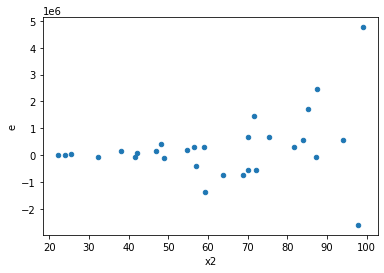

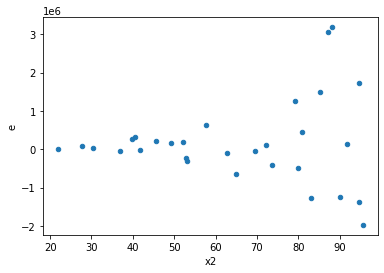

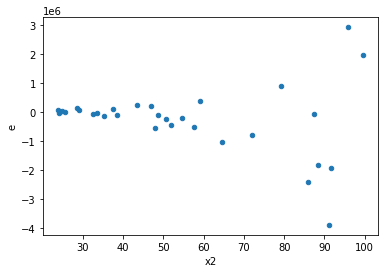

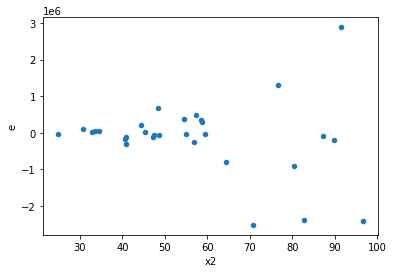

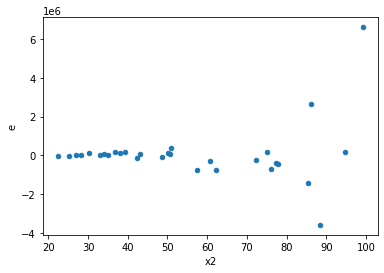

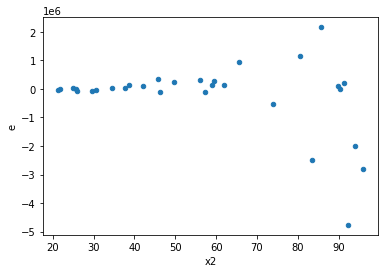

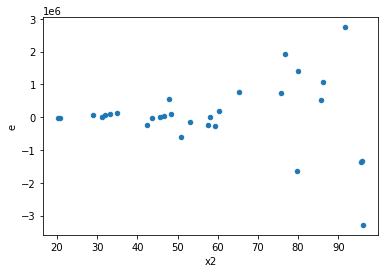

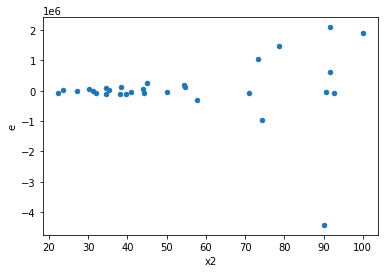

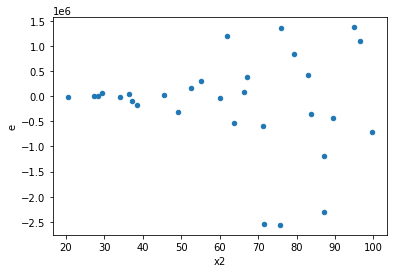

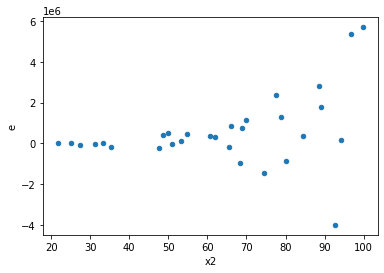

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,9.0,9.0,28702544743982.176,178319259588.04437,3587818092997.772,22289907448.505547,160.96155182727423,1.4859331987082669e-08,0.999999992570334,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,28186087866730.516,278581174340.28534,3523260983341.3145,34822646792.53567,101.17728857119887,1.1687952983230332e-07,0.9999999415602351,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,35368003381241.6,85452778372.02908,4421000422655.2,10681597296.503635,413.8894492963434,2.1794832605337433e-10,0.9999999998910258,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,17652597263931.734,157216566343.0405,2206574657991.467,19652070792.880062,112.28204300947807,7.367324905693806e-08,0.9999999631633755,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,38213569102449.48,59572729687.958954,4776696137806.185,7446591210.994869,641.460770768967,3.053535202468538e-11,0.9999999999847323,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,29150557614297.715,41034092949.80248,3643819701787.2144,5129261618.72531,710.3984886410906,1.9310331111910273e-11,0.9999999999903448,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,25849648890824.527,350043810738.0381,3231206111353.066,43755476342.25476,73.84689601088134,4.6942672460303925e-07,0.9999997652866377,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,24469179589524.61,28882629972.7696,3058647448690.576,3610328746.5962,847.1936112671882,8.756995129033385e-12,0.9999999999956215,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,11364958525308.549,184964262254.15027,1420619815663.5686,23120532781.768784,61.44407782781583,1.052694317049685e-06,0.9999994736528415,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,28702544743982.176,178319259588.04437,3587818092997.772,22289907448.505547,160.96155182727423,1.4859331987082669e-08,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,28186087866730.516,278581174340.28534,3523260983341.3145,34822646792.53567,101.17728857119887,1.1687952983230332e-07,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,35368003381241.6,85452778372.02908,4421000422655.2,10681597296.503635,413.8894492963434,2.1794832605337433e-10,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,17652597263931.734,157216566343.0405,2206574657991.467,19652070792.880062,112.28204300947807,7.367324905693806e-08,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,38213569102449.48,59572729687.958954,4776696137806.185,7446591210.994869,641.460770768967,3.053535202468538e-11,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,29150557614297.715,41034092949.80248,3643819701787.2144,5129261618.72531,710.3984886410906,1.9310331111910273e-11,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,25849648890824.527,350043810738.0381,3231206111353.066,43755476342.25476,73.84689601088134,4.6942672460303925e-07,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,24469179589524.61,28882629972.7696,3058647448690.576,3610328746.5962,847.1936112671882,8.756995129033385e-12,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,11364958525308.549,184964262254.15027,1420619815663.5686,23120532781.768784,61.44407782781583,1.052694317049685e-06,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    990
Reject001=1 : Homoscedasticity       10
Name: Result_test, dtype: int64